In [4]:
import pandas as pd

In [5]:
df_1 = pd.read_csv('../datas/ECOLAB_4/test/C1.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
df_2 = pd.read_csv('../datas/ECOLAB_4/test/C2.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
df_3 = pd.read_csv('../datas/ECOLAB_4/test/C3.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
df_4 = pd.read_csv('../datas/ECOLAB_4/test/C4.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
#df_5 = pd.read_csv('../datas/ECOLAB_3/C1/C1_5.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
#df_6 = pd.read_csv('../datas/ECOLAB_3/C1/C1_6.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)
#df_7 = pd.read_csv('../datas/ECOLAB_3/C1/C1_7.csv', sep=',',low_memory=False).drop('Unnamed: 0', axis=1)
#df_8 = pd.read_csv('../datas/ECOLAB_3/C1/C1_8.csv', sep=',', low_memory=False).drop('Unnamed: 0', axis=1)

In [6]:
df_4['datatime']

0         2025-02-05 01:00:00
1         2025-02-05 01:00:15
2         2025-02-05 01:00:16
3         2025-02-05 01:00:45
4         2025-02-05 01:00:46
                 ...         
213865    2025-03-18 15:13:15
213866    2025-03-18 15:13:44
213867    2025-03-18 15:13:45
213868    2025-03-18 15:14:14
213869    2025-03-18 15:14:15
Name: datatime, Length: 213870, dtype: object

In [7]:
df_2.head()

,TEMPERATURE_SONDE [R],CONSIGNE_ECLAIRAGE [I],CONSIGNE_TEMP_FOND [R],HYGROMETRIE_CELLULE [R],TEMPERATURE_REPRISE [R],CONSIGNE_VENTILATION [I],HYGROMETRIE_CONSIGNE [I],TEMPERATURE_CONSIGNE [R],HYGROMETRIE_SOUFFLAGE [R],TEMPERATURE_SOUFFLAGE [R],datatime
0,0,0,17,0,0,60,80,0,0,0,2025-07-04 10:34:08
1,0,0,17,0,0,60,80,0,0,0,2025-07-04 10:34:28
2,0,0,17,0,0,60,80,0,0,0,2025-07-04 10:34:52
3,0,0,17,0,0,60,80,0,0,0,2025-07-04 10:35:54
4,"21,5",0,17,59,"21,700001",60,80,0,65,"20,5",2025-07-04 10:36:59


In [8]:
import pandas as pd
from functools import reduce
import glob
dfs = [df_1, df_2, df_3, df_4]

# Fusionne tous les DataFrames sur 'datetime' (outer join pour ne rien perdre)
df_merged = reduce(lambda left, right: pd.merge(left, right, on='datatime', how='outer'), dfs)

# Trie les lignes par datetime (obligatoire pour pouvoir ffill correctement)
df_merged = df_merged.sort_values('datatime')

# Applique un "forward fill" : chaque valeur NaN sera remplacée par la dernière valeur connue
df_merged = df_merged.ffill()

# Optionnel : reset index si tu veux un index simple
df_merged = df_merged.reset_index(drop=True)

# Voilà le DataFrame fusionné
print(df_merged)

        CONSIGNE_ROTATION [I]  CONSIGNE_ECLAIRAGE [I]_x  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
...                       ...                       ...   
230719                    0.0                       0.0   
230720                    0.0                       0.0   
230721                    0.0                       0.0   
230722                    0.0                       0.0   
230723                    0.0                       0.0   

        CONSIGNE_TEMP_FOND [R]_x TEMPERATURE_REPRISE [R]_x  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN           

In [9]:
df_merged.head()

,CONSIGNE_ROTATION [I],CONSIGNE_ECLAIRAGE [I]_x,CONSIGNE_TEMP_FOND [R]_x,TEMPERATURE_REPRISE [R]_x,CONSIGNE_VENTILATION [I]_x,HYGROMETRIE_CONSIGNE [I]_x,TEMPERATURE_CONSIGNE [R]_x,HYGROMETRIE_SOUFFLAGE [R]_x,TEMPERATURE_SOUFFLAGE [R]_x,datatime,...,HYGROMETRIE_SOUFFLAGE [R],TEMPERATURE_SOUFFLAGE [R],TEMPERATURE_MEG_FROID [R],TEMPERATURE_MEG_CHAUD [R],BP_R134_EN_BARS [R],BP_R134_EN_DEGRES [R],CONSIGNE_BALLON_FROID [R],CONSIGNE_BALLON_CHAUD [R],HP_R134_EN_BARS [R],HP_R134_EN_DEGRES [R]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-05 01:00:00,...,NaN,NaN,"-5,8000002",45,"1,3361666","-6,0422668",-6.0,45.0,"2,22","2,5189381"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-05 01:00:15,...,NaN,NaN,"-5,8000002",45,"1,3361666","-6,0422668",-6.0,45.0,"2,22","2,5189381"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-05 01:00:16,...,NaN,NaN,"-5,8000002",45,"1,3361666","-6,0422668",-6.0,45.0,"2,22","2,5189381"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-05 01:00:45,...,NaN,NaN,"-5,8000002",45,"1,3361666","-6,0422668",-6.0,45.0,"2,22","2,5189381"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-05 01:00:46,...,NaN,NaN,"-5,8000002",45,"1,3361666","-6,0422668",-6.0,45.0,"2,22","2,5189381"


In [10]:
df_merged['datatime']

0         2025-02-05 01:00:00
1         2025-02-05 01:00:15
2         2025-02-05 01:00:16
3         2025-02-05 01:00:45
4         2025-02-05 01:00:46
                 ...         
230719    2025-07-08 13:35:17
230720    2025-07-08 13:35:47
230721    2025-07-08 13:36:17
230722    2025-07-08 13:36:47
230723    2025-07-08 13:37:17
Name: datatime, Length: 230724, dtype: object

In [11]:
df_cols = df_merged.drop(columns='datatime').columns
datetime = df_merged['datatime']
df_merged = df_merged.replace(',', '.', regex=True)
df_merged = df_merged.apply(pd.to_numeric, errors='coerce')
df_merged['datetime'] = datetime

In [12]:
df_merged['datetime']

0         2025-02-05 01:00:00
1         2025-02-05 01:00:15
2         2025-02-05 01:00:16
3         2025-02-05 01:00:45
4         2025-02-05 01:00:46
                 ...         
230719    2025-07-08 13:35:17
230720    2025-07-08 13:35:47
230721    2025-07-08 13:36:17
230722    2025-07-08 13:36:47
230723    2025-07-08 13:37:17
Name: datetime, Length: 230724, dtype: object

CONSIGNE_ROTATION [I]


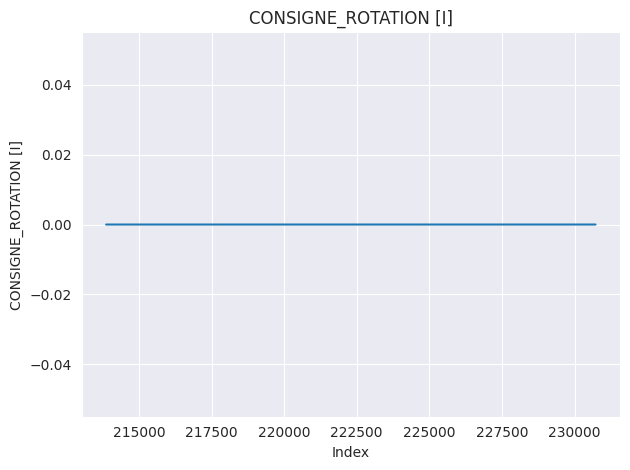

CONSIGNE_ECLAIRAGE [I]_x


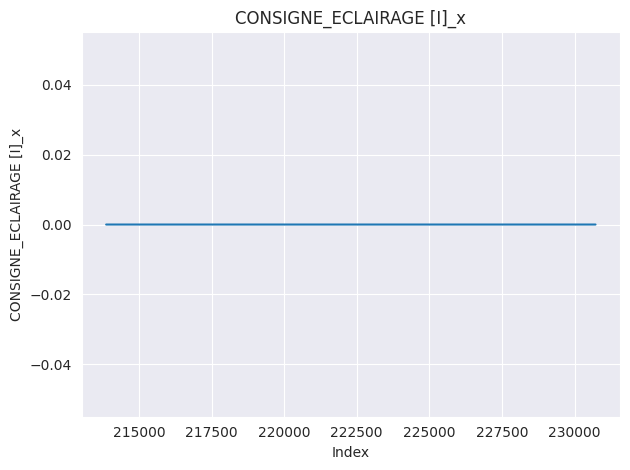

CONSIGNE_TEMP_FOND [R]_x


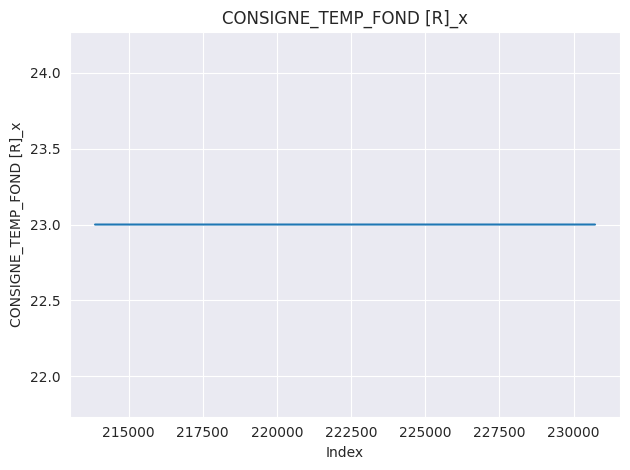

TEMPERATURE_REPRISE [R]_x


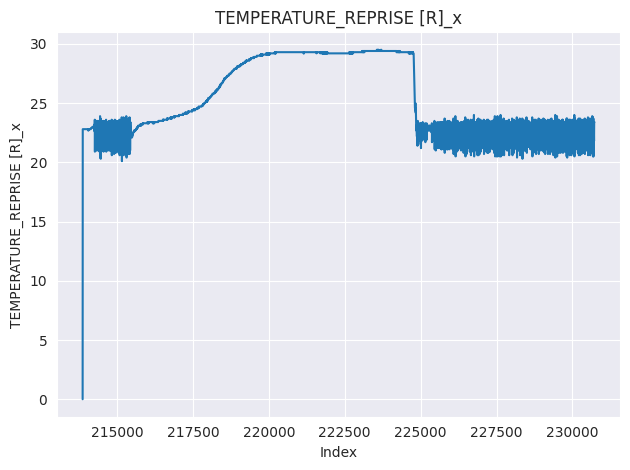

CONSIGNE_VENTILATION [I]_x


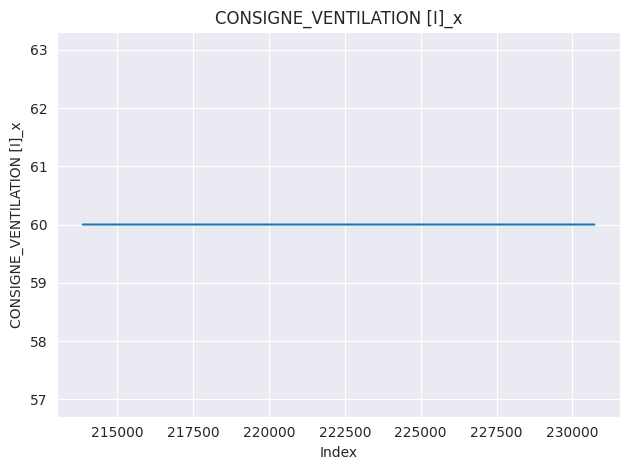

HYGROMETRIE_CONSIGNE [I]_x


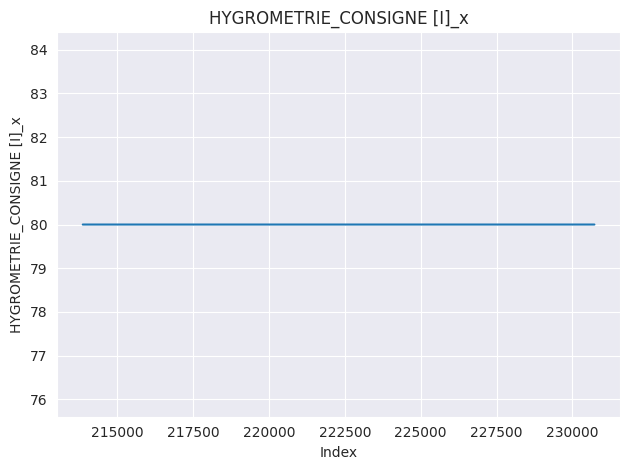

TEMPERATURE_CONSIGNE [R]_x


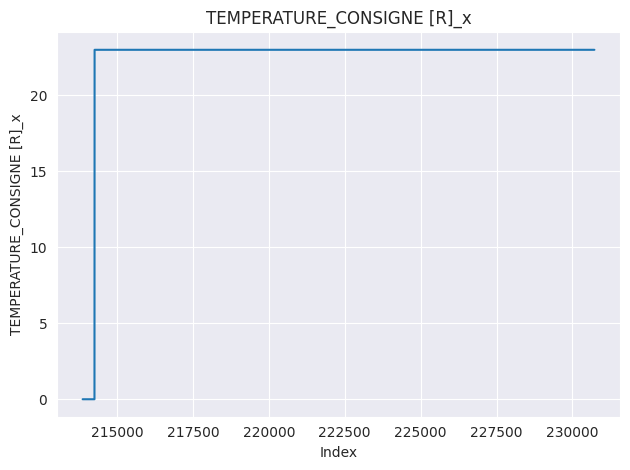

HYGROMETRIE_SOUFFLAGE [R]_x


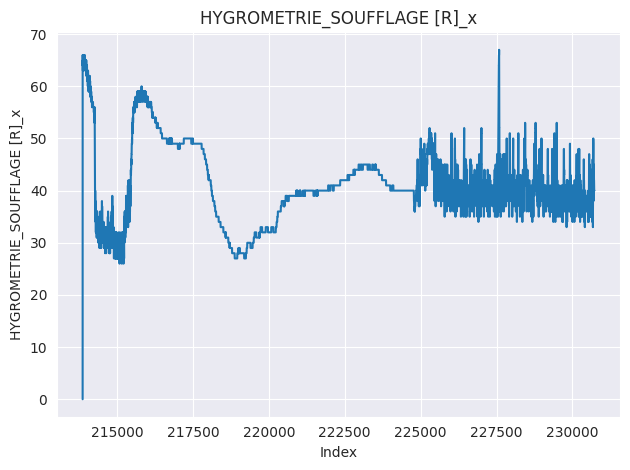

TEMPERATURE_SOUFFLAGE [R]_x


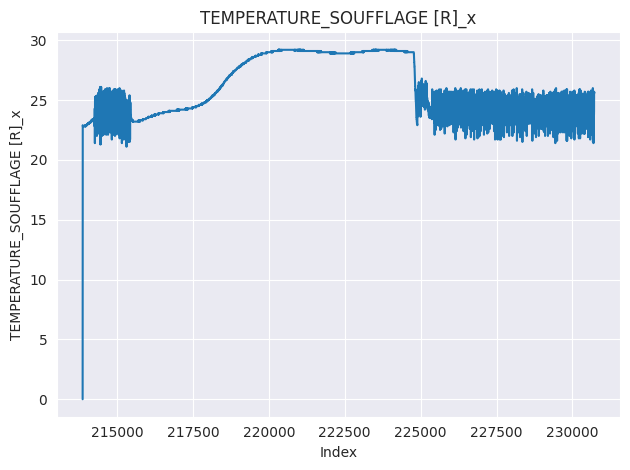

TEMPERATURE_SONDE [R]_x


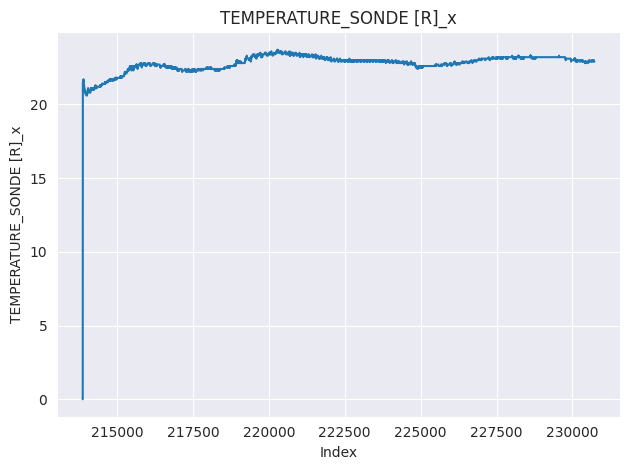

CONSIGNE_ECLAIRAGE [I]_y


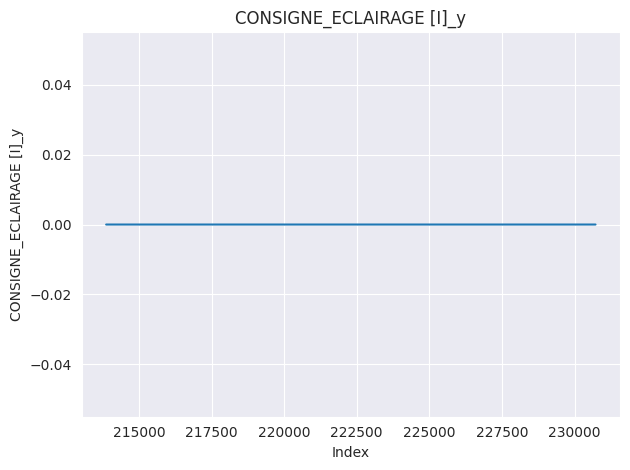

CONSIGNE_TEMP_FOND [R]_y


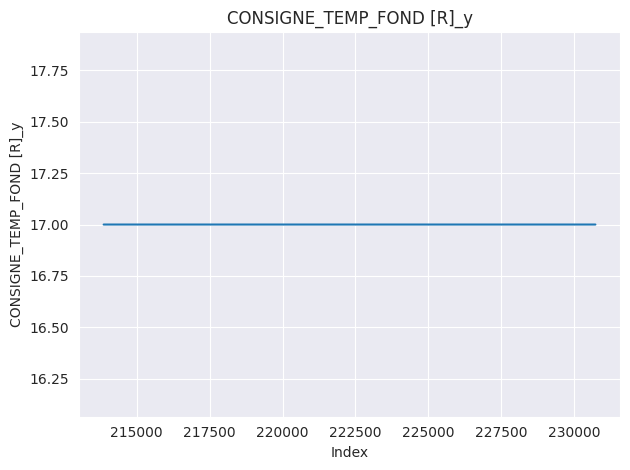

HYGROMETRIE_CELLULE [R]_x


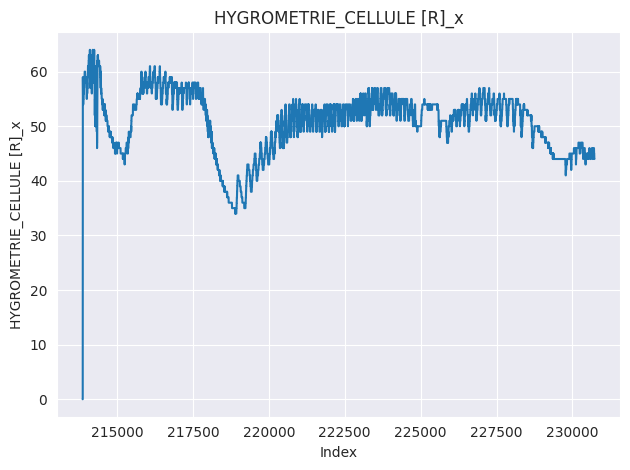

TEMPERATURE_REPRISE [R]_y


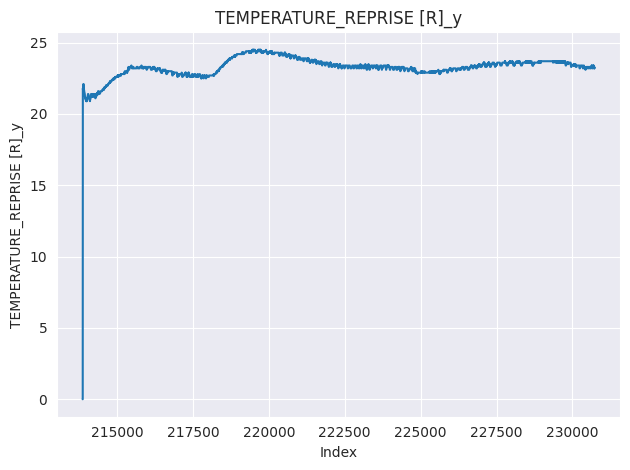

CONSIGNE_VENTILATION [I]_y


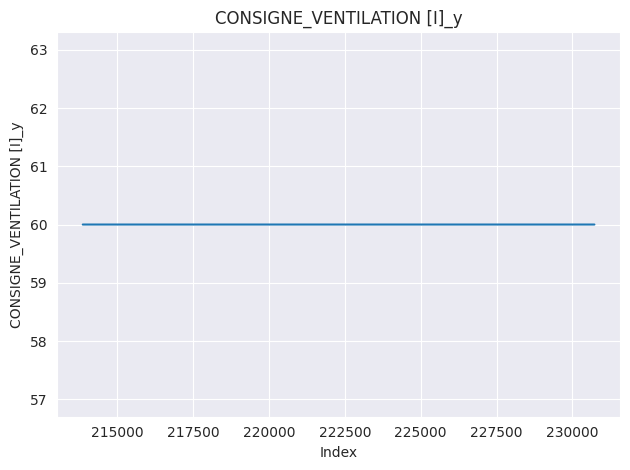

HYGROMETRIE_CONSIGNE [I]_y


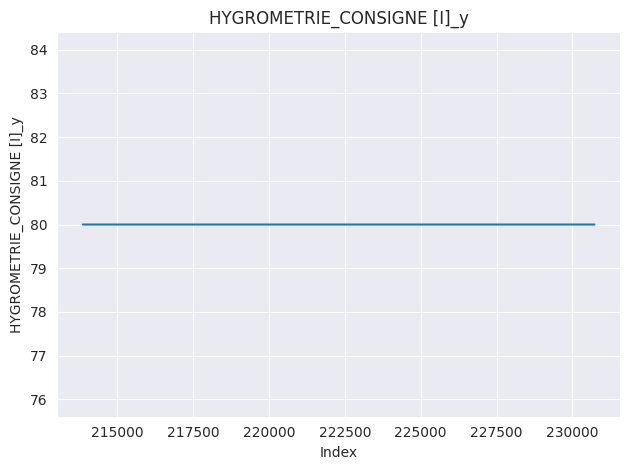

TEMPERATURE_CONSIGNE [R]_y


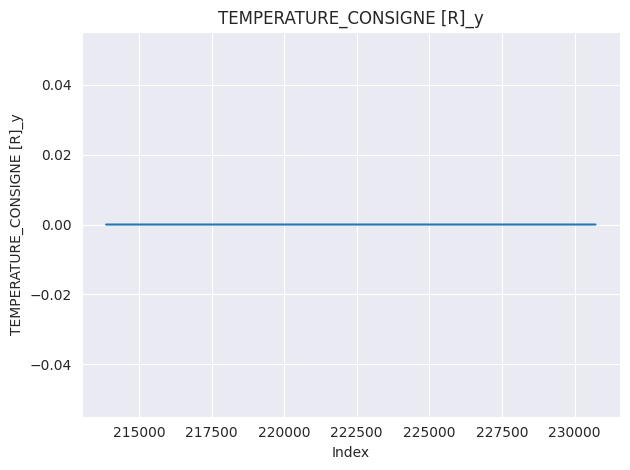

HYGROMETRIE_SOUFFLAGE [R]_y


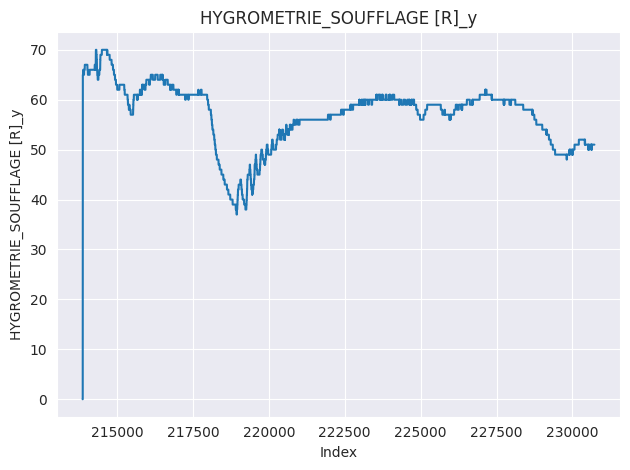

TEMPERATURE_SOUFFLAGE [R]_y


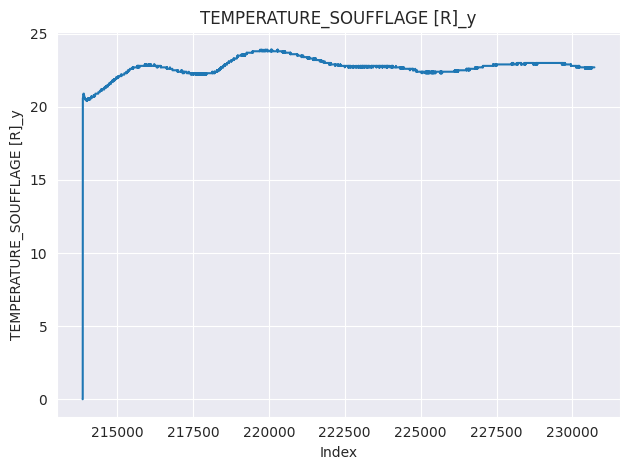

TEMPERATURE_SONDE [R]_y


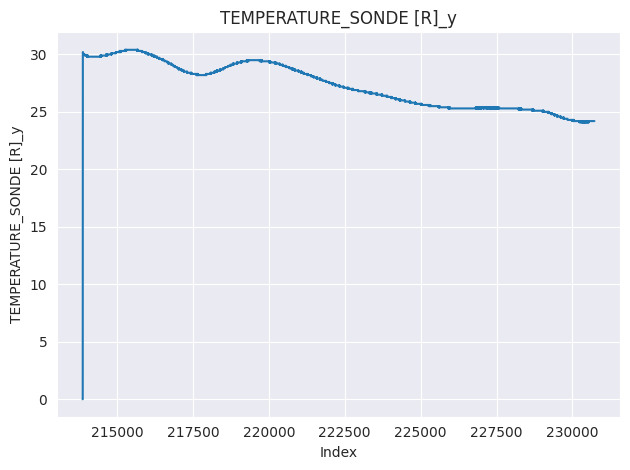

CONSIGNE_ECLAIRAGE [I]


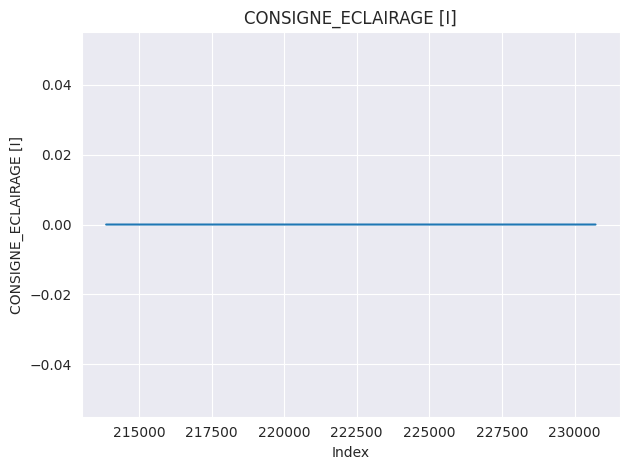

HYGROMETRIE_CELLULE [R]_y


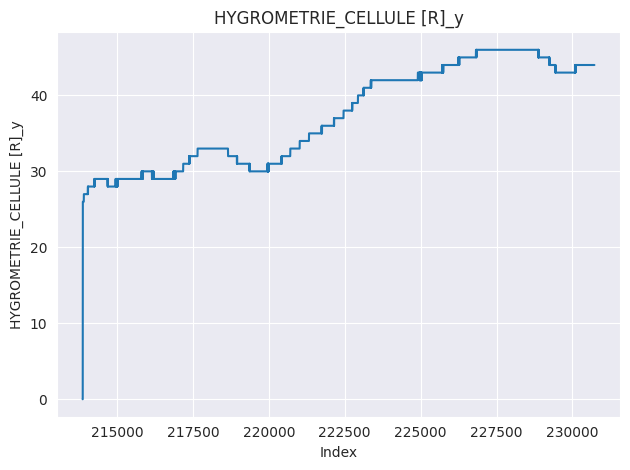

TEMPERATURE_REPRISE [R]


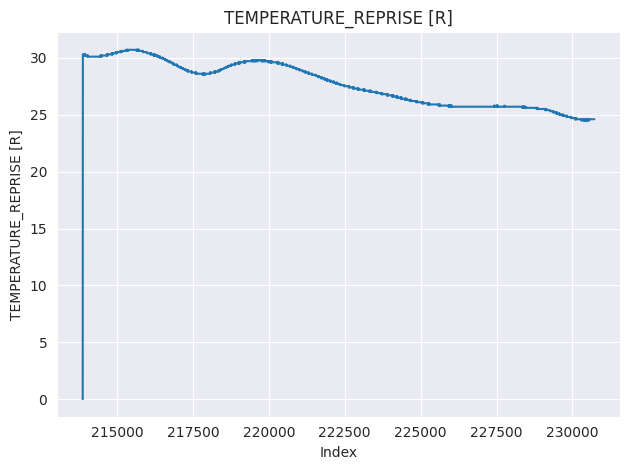

CONSIGNE_VENTILATION [I]


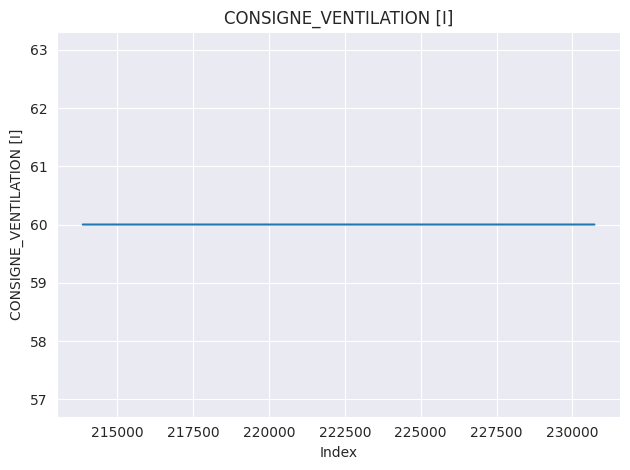

HYGROMETRIE_CONSIGNE [I]


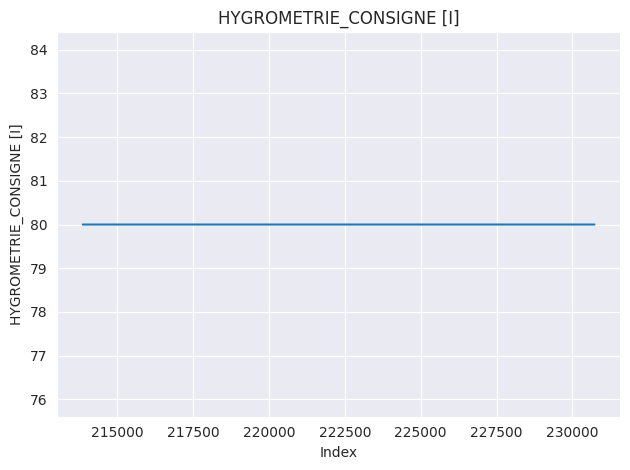

TEMPERATURE_CONSIGNE [R]


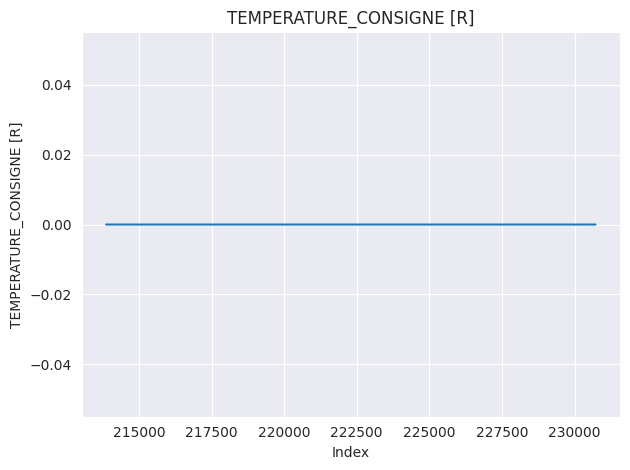

HYGROMETRIE_SOUFFLAGE [R]


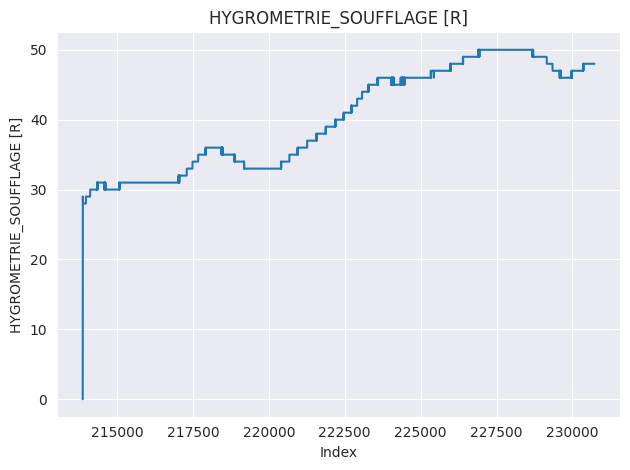

TEMPERATURE_SOUFFLAGE [R]


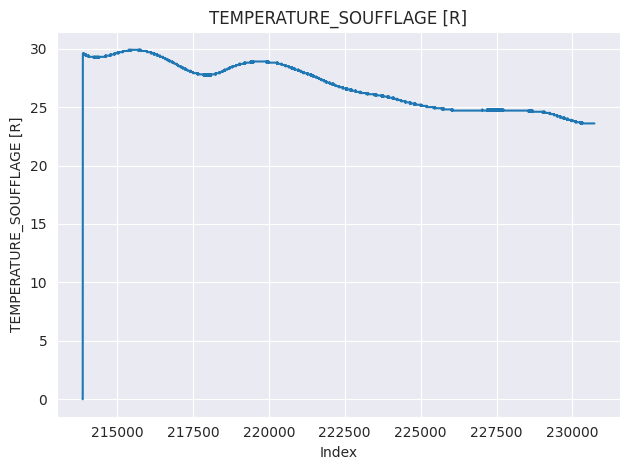

TEMPERATURE_MEG_FROID [R]


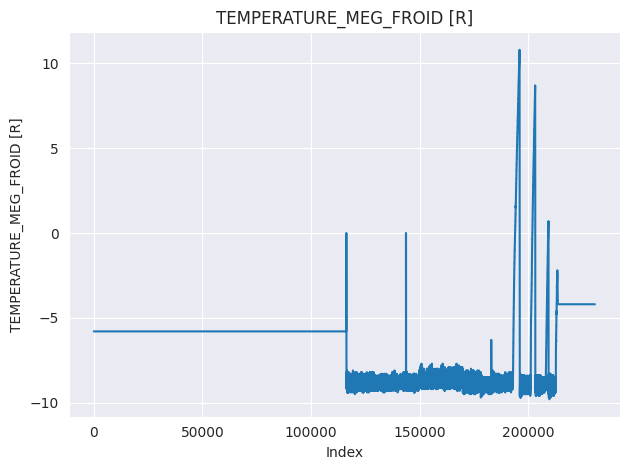

TEMPERATURE_MEG_CHAUD [R]


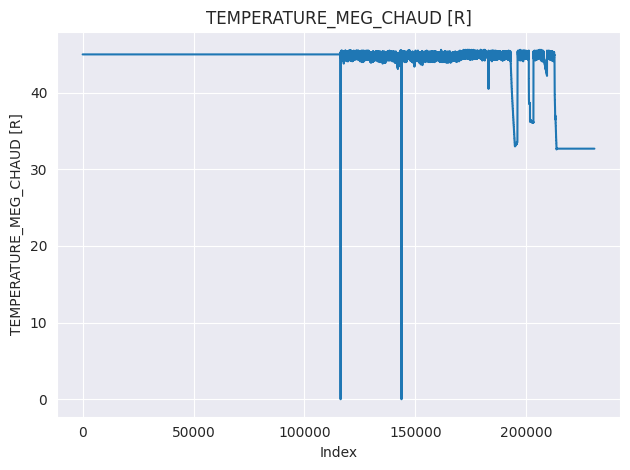

BP_R134_EN_BARS [R]


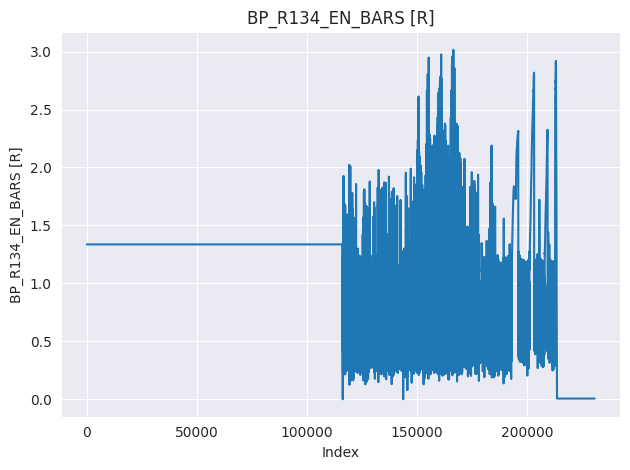

BP_R134_EN_DEGRES [R]


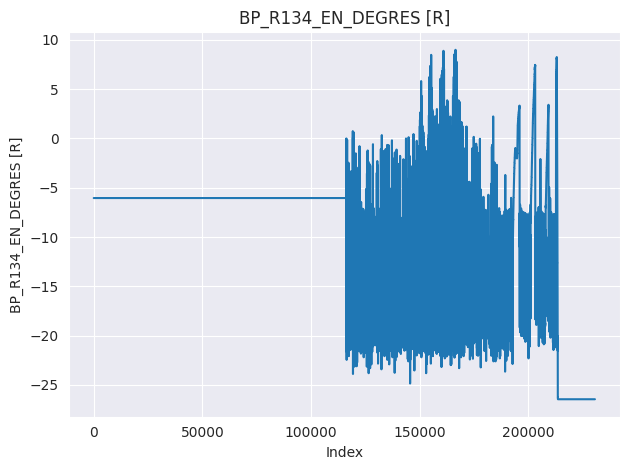

CONSIGNE_BALLON_FROID [R]


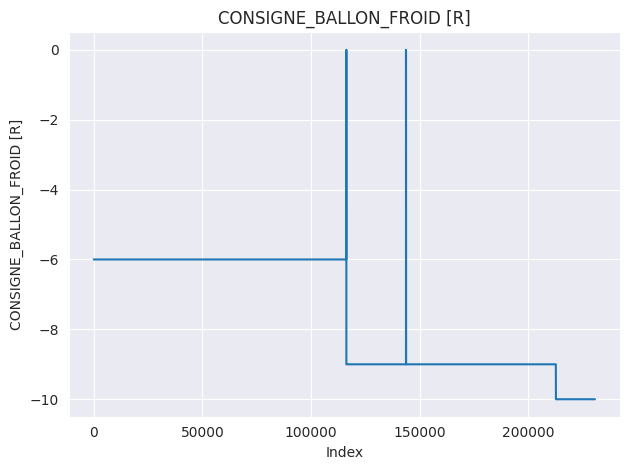

CONSIGNE_BALLON_CHAUD [R]


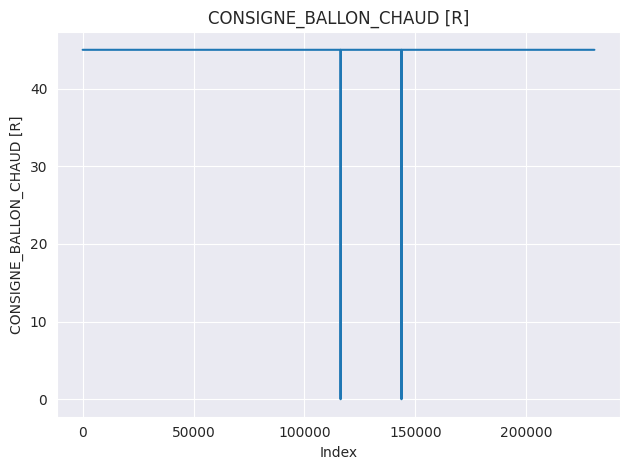

HP_R134_EN_BARS [R]


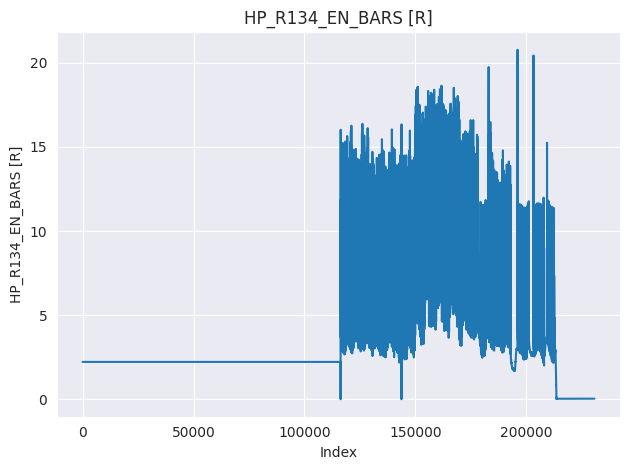

HP_R134_EN_DEGRES [R]


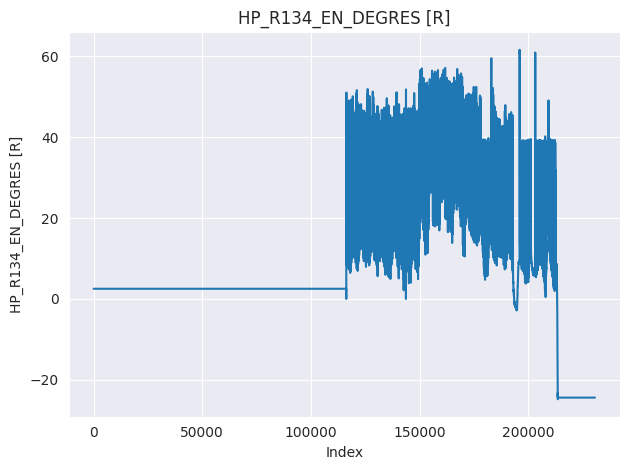

In [13]:
import matplotlib.pyplot as plt

for col in df_cols:
    plt.figure()  # Crée une nouvelle figure à chaque boucle
    df_merged[col].dropna().plot(title=col)
    plt.xlabel("Index")
    print(col)
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
df_merged.to_csv('../datas/ECOLAB_4/test/C4_all.csv', index=False)